# Activity 2.1: Variational data assimilation (3D and 4D)

## To-do list
### Science and explanatory text (Ieva/Amos)
- [ ] Introduce concept of an "identical twin" experiment and what's going on here
- [ ] Explain that we are pretending we have a perfect model but imperfect knowledge of initial conditions and observations, then we're trying to reconstruct the truth
- [ ] Create more than one observation for the experiment?
- [ ] Come up with better set of parameters that illustrate the improvement with 4DVAR method?
- [ ] Provide guidance to user about what they can tweak
- [ ] Point out to participants the notable features of each graph

### Tidy-up and presentation (Jon)
- [ ] Put Lorenz figures side by side to save vertical space
- [ ] Harmonise variable names between text and code (e.g. `xyz` vs `x[0], x[1], x[2]`)
- [ ] Harmonise terminology (Truth, Nature Run)
- [ ] Show the assimilation window in the 4DVAR graphs?
- [ ] Add credits (esp. to Javier as we're using his code)


In [25]:
# Easier version. 2017. JA
# Last reviewed January 2020 for python 3
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from common_misc import gen_obs, rmse_spread, createH, getBsimple
from common_plots import plotRMSP

from L63_model import lorenz63
from L63_var import var3d, var4d
from L63_plots import plotL63, plotL63obs, plotL63DA_var

## 1. The Lorenz63 model

We will use the Lorenz 63 dynamical model in this activity. It is a simple model, which shows chaotic behaviour. The model describes the change of three variables, which we denote x, y, and z. We run the model to generate trajectories for the three variables and will consider these to be the true trajectories, which we aim to approximate using data assimilation. We will use the true trajectories to generate the observations and the background, and to evaluate the results of data assimilation.

We run the model for some time (tmax = 10) and show the trajectories of each variable over time below. The trajectories of x, y, and z are also plotted together. This gives us the famous butterfly attractor.

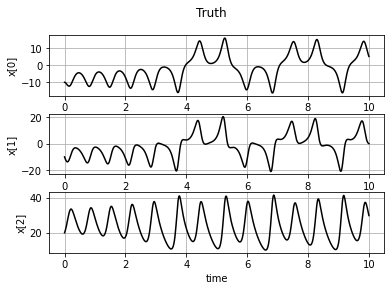

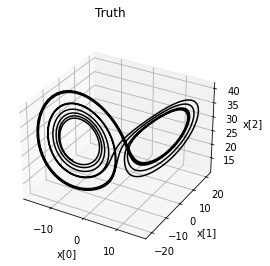

In [26]:
# The initial conditions
x0 = [-10, -10, 20]
# Compute the Lorenz model up to t=10
t, xt = lorenz63(x0, tmax=10)
plotL63(t, xt, True)

## 2. Compute the Nature Run

For the experiments we will run the system for a shorter time (tmax = 1).

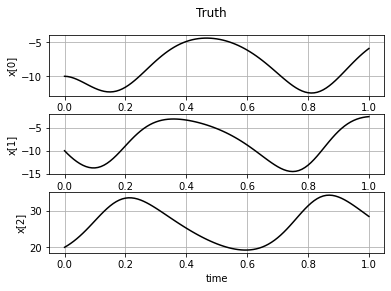

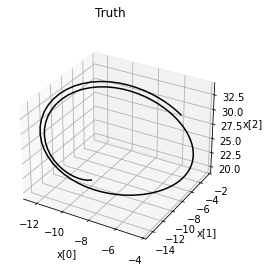

In [27]:
t, xt = lorenz63(x0, tmax=1)
plotL63(t, xt, True)

## 3. Generate some observations
Run 3D-Var and 4D-Var experiments with one observation at the final time (period_obs = 100, anawin=1 in 4D-Var). Note that 3D-Var assimilation is performed only at the observation time. What is the difference between the 3D-Var and 4D-Var analyses?

We generate observations of the model variables x, y, and z by adding noise to the trajectories, which we generated before. A higher var_obs value gives larger noise and hence we can trust the observations less. The period_obs describes the frequency in time of observations. We show the true trajectories (black) and the observations (red dots).

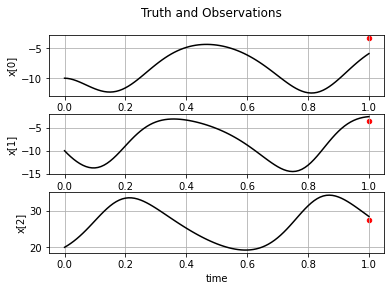

In [35]:
obsgrid = 'xyz' # This means that we will generate obs for all 3 variables
model = 'L63'
H, observed_vars = createH(obsgrid, model)

# Generating the observations
# (Can tweak var_obs to give obs that are further from the truth)
tobs, y, R = gen_obs(t, xt, period_obs=100, H=H, var_obs=0.5, seed=1)
plotL63obs(t, xt, tobs, y, observed_vars)

We now create a simple background error covariance matrix.

In [34]:
Nx = np.size(x0)
Bpre, Bcorr = getBsimple(model, Nx)
tune = 1 # depends on the observational frequency
B = tune * Bpre

## 4. Data Assimilation using 3D-Var

We will now perform data assimilation using the 3D-Var method. An assimilation is performed at every observation time. We generate the background for every assimilation (blue). The analysis is shown in magenta.

t = 1.0


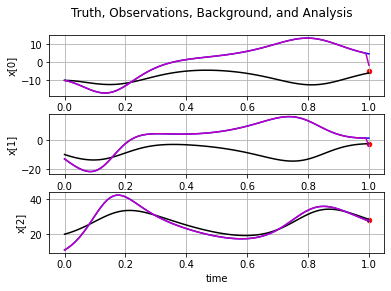

In [30]:
# A guess to start from in our assimilation experiments
# (We have a perfect model but imperfect knowledge of initial conditions and observations)
x0guess = [-11, -12, 10]
xb, xa = var3d(x0guess, t, tobs, y, H, B, R, model, Nx)
plotL63DA_var(t, xt, tobs, y, observed_vars, xb, xa)

The root mean square error is used to evaluate the differences between the true trajectory of the three variables and the analysis, and the true trajectory and the background at every time step. A small root mean square error shows good agreement between the compared trajectories.

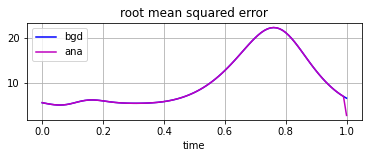

In [31]:
rmseb = rmse_spread(xt, xb, None, 1)
rmsea = rmse_spread(xt, xa, None, 1)
plotRMSP(t, rmseb, rmsea)

## 5. Data assimilation using 4D-Var

We will now perform data assimilation using the 4D-Var method. An assimilation is performed at every analysis window, that is we can choose how many observations of each variable to include into the assimilation by setting anawin to the required number of observations. We generate the background for every assimilation (blue as for 3D-Var). The analysis is shown in magenta (as for 3D-Var). 

t = 1.0


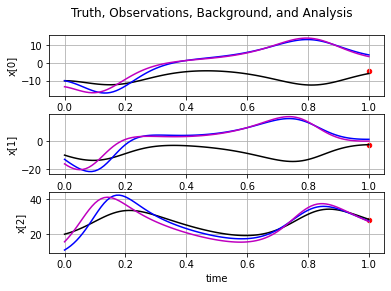

In [32]:
anawin = 1 #int(100/period_obs) Possibly convert this to time units 
xtol = 1e-6
xb, xa = var4d(x0guess, t, tobs, anawin, y, H, B, R, model, Nx, xtol)
plotL63DA_var(t, xt, tobs, y, observed_vars, xb, xa)
# Show the start of assimilation windows: vertical lines of a different colour, or a separate panel to show 
# the assimilation window length

Again we calculation the root mean squared error

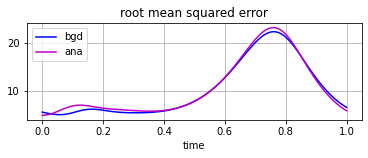

In [33]:
rmseb = rmse_spread(xt, xb, None, 1)
rmsea = rmse_spread(xt, xa, None, 1)
plotRMSP(t, rmseb, rmsea)

## 6. Conclusions
What are these?